# House Prices - Advanced Regression Techniques

## Giới thiệu
Bộ dữ liệu **Ames Housing** được thu thập tại **thành phố Ames, bang Iowa (Mỹ)**, mô tả chi tiết các căn nhà được bán trong giai đoạn **2006–2010**.  
Biến mục tiêu là **`SalePrice`** – giá bán của căn nhà (USD).  

Mục tiêu của bài toán:

> Dự đoán giá bán (`SalePrice`) dựa trên các đặc điểm vật lý, vị trí, và điều kiện của ngôi nhà.

### Import thư viện

In [123]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.base import clone
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 42

### Load dữ liệu

In [124]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

## Exploratory Data Analysis - EDA

### Tổng quan dữ liệu

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Bộ dữ liệu **Ames Housing** gồm:
- **1460 dòng (mẫu nhà)**  
- **81 cột (biến đặc trưng)**

→ Trong đó, **biến mục tiêu (target)** là `SalePrice` — giá bán của ngôi nhà (USD).

In [126]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Tóm tắt thông tin các feature

In [127]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


🎯 Biến mục tiêu:
- `SalePrice`: Giá bán của căn nhà → Đây là biến mục tiêu cần dự đoán.

🏠 Thông tin tổng quan về nhà và khu đất:
- `MSSubClass`: Loại công trình
- `MSZoning`: Phân khu quy hoạch chung
- `LotFrontage`: Chiều dài mặt tiền giáp đường (tính bằng feet)
- `LotArea`: Diện tích lô đất (tính bằng feet vuông)
- `Street`: Loại đường tiếp cận
- `Alley`: Loại hẻm hoặc lối đi phía sau nhà
- `LotShape`: Hình dạng tổng thể của lô đất
- `LandContour`: Độ bằng phẳng của khu đất
- `Utilities`: Các loại tiện ích có sẵn (điện, nước, gas,...)
- `LotConfig`: Cấu hình của lô đất
- `LandSlope`: Độ dốc của khu đất
- `Neighborhood`: Khu phố hoặc vùng lân cận trong thành phố Ames
- `Condition1`: Vị trí so với đường chính hoặc đường sắt
- `Condition2`: Vị trí so với đường chính hoặc đường sắt

🏗️ Kiểu nhà và phong cách xây dựng
- `BldgType`: Loại hình nhà
- `HouseStyle`: Kiểu thiết kế của căn nhà
- `OverallQual`: Đánh giá tổng thể về chất lượng vật liệu và hoàn thiện
- `OverallCond`: Đánh giá tổng thể về tình trạng bảo trì, sửa chữa
- `YearBuilt`: Năm xây dựng ban đầu
- `YearRemodAdd`: Năm tu sửa hoặc mở rộng gần nhất

🧱 Vật liệu và kết cấu bên ngoài
- `RoofStyle`: Kiểu mái
- `RoofMatl`: Vật liệu làm mái
- `Exterior1st`: Vật liệu ốp tường bên ngoài (lớp thứ nhất)
- `Exterior2nd`: Vật liệu ốp tường bên ngoài (lớp thứ hai, nếu có)
- `MasVnrType`: Loại vật liệu ốp tường bằng đá/gạch (veneer)
- `MasVnrArea`: Diện tích tường ốp veneer (tính bằng feet vuông)
- `ExterQual`: Chất lượng vật liệu bên ngoài
- `ExterCond`: Tình trạng vật liệu bên ngoài

🏚️ Nền móng và tầng hầm
- `Foundation`: Loại móng nhà
- `BsmtQual`: Chiều cao tầng hầm
- `BsmtCond`: Tình trạng tầng hầm
- `BsmtExposure`: Mức độ thông thoáng
- `BsmtFinType1`: Chất lượng phần tầng hầm đã hoàn thiện (loại 1)
- `BsmtFinSF1`: Diện tích hoàn thiện loại 1 (tính bằng feet vuông)
- `BsmtFinType2`: Chất lượng phần hoàn thiện thứ hai (nếu có)
- `BsmtFinSF2`: Diện tích hoàn thiện loại 2 (tính bằng feet vuông)
- `BsmtUnfSF`: Diện tích tầng hầm chưa hoàn thiện
- `TotalBsmtSF`: Tổng diện tích tầng hầm

🔥 Hệ thống tiện ích trong nhà
- `Heating`: Loại hệ thống sưởi
- `HeatingQC`: Chất lượng và tình trạng hệ thống sưởi
- `CentralAir`: Có máy lạnh trung tâm hay không
- `Electrical`: Hệ thống điện trong nhà

🧍‍♂️ Diện tích sinh hoạt và phòng ốc
- `1stFlrSF`: Diện tích tầng 1 (tính bằng feet vuông)
- `2ndFlrSF`: Diện tích tầng 2
- `LowQualFinSF`: Diện tích hoàn thiện chất lượng thấp (tất cả các tầng)
- `GrLivArea`: Diện tích sinh hoạt trên mặt đất
- `BsmtFullBath`: Số phòng tắm đầy đủ trong tầng hầm
- `BsmtHalfBath`: Số phòng tắm nửa trong tầng hầm
- `FullBath`: Số phòng tắm đầy đủ trên mặt đất
- `HalfBath`: Số phòng tắm nửa trên mặt đất
- `Bedroom`: Số phòng ngủ
- `Kitchen`: Số lượng nhà bếp
- `KitchenQual`: Chất lượng nhà bếp
- `TotRmsAbvGrd`: Tổng số phòng trên mặt đất (không tính phòng tắm)
- `Functional`: Đánh giá chức năng sử dụng của ngôi nhà
- `Fireplaces`: Số lượng lò sưởi
- `FireplaceQu`: Chất lượng của lò sưởi

🚗 Thông tin về gara
- `GarageType`: Vị trí gara
- `GarageYrBlt`: Năm xây gara
- `GarageFinish`: Mức độ hoàn thiện bên trong gara
- `GarageCars`: Sức chứa của gara (tính bằng số xe)
- `GarageArea`: Diện tích gara (tính bằng feet vuông)
- `GarageQual`: Chất lượng gara
- `GarageCond`: Tình trạng gara
- `PavedDrive`: Lối vào gara có được lát nhựa hay không

🌳 Tiện ích ngoài trời
- `WoodDeckSF`: Diện tích sàn gỗ ngoài trời
- `OpenPorchSF`: Diện tích hiên mở
- `EnclosedPorch`: Diện tích hiên kín
- `3SsnPorch`: Diện tích hiên ba mùa
- `ScreenPorch`: Diện tích hiên có lưới chắn
- `PoolArea`: Diện tích hồ bơi
- `PoolQC`: Chất lượng hồ bơi
- `Fence`: Chất lượng hàng rào
- `MiscFeature`: Đặc điểm khác
- `MiscVal`: Giá trị của đặc điểm khác đó (tính bằng đô la)

📅 Thông tin giao dịch
- `MoSold`: Tháng bán
- `YrSold`: Năm bán
- `SaleType`: Loại hình bán (thông thường, bán lại, thừa kế,...)
- `SaleCondition`: Tình trạng giao dịch (bán bình thường, bán nhanh, đấu giá,...)

### Dữ liệu thiếu (Missing values)

In [129]:
def display_missing_data(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    percent = (missing / len(df)) * 100
    print(pd.DataFrame({'Giá trị thiếu': missing, 'Phần trăm (%)': percent.round(2)}))

display_missing_data(train_df)

              Giá trị thiếu  Phần trăm (%)
PoolQC                 1453          99.52
MiscFeature            1406          96.30
Alley                  1369          93.77
Fence                  1179          80.75
MasVnrType              872          59.73
FireplaceQu             690          47.26
LotFrontage             259          17.74
GarageType               81           5.55
GarageYrBlt              81           5.55
GarageFinish             81           5.55
GarageQual               81           5.55
GarageCond               81           5.55
BsmtFinType2             38           2.60
BsmtExposure             38           2.60
BsmtFinType1             37           2.53
BsmtCond                 37           2.53
BsmtQual                 37           2.53
MasVnrArea                8           0.55
Electrical                1           0.07


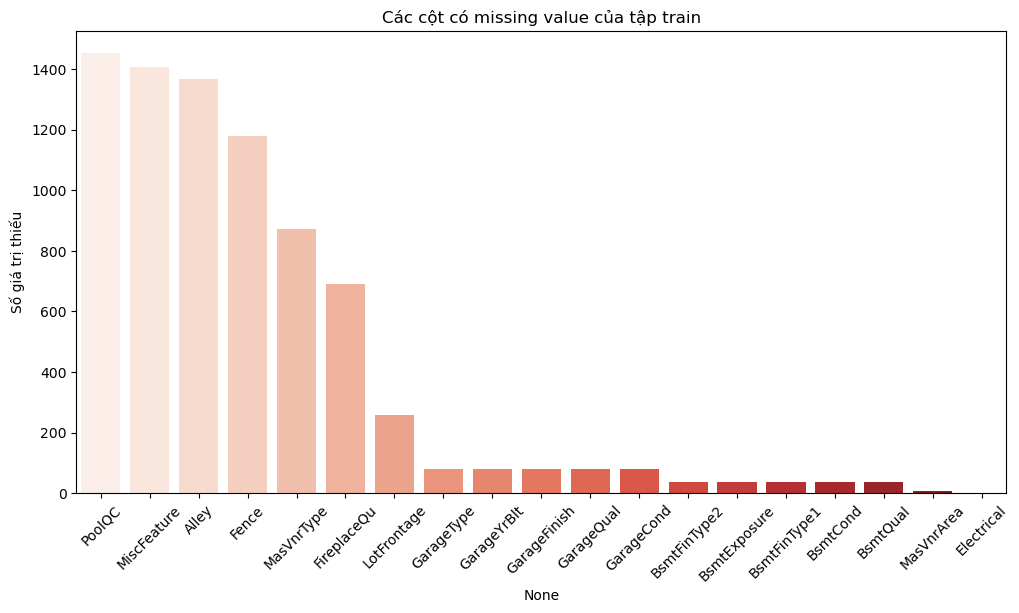

In [130]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=missing.index, y=missing.values, palette="Reds")
plt.xticks(rotation=45)  # xoay nhãn cho vừa
plt.ylabel("Số giá trị thiếu")
plt.title("Các cột có missing value của tập train")
plt.show()

In [131]:
display_missing_data(test_df)

              Giá trị thiếu  Phần trăm (%)
PoolQC                 1456          99.79
MiscFeature            1408          96.50
Alley                  1352          92.67
Fence                  1169          80.12
MasVnrType              894          61.27
FireplaceQu             730          50.03
LotFrontage             227          15.56
GarageCond               78           5.35
GarageYrBlt              78           5.35
GarageQual               78           5.35
GarageFinish             78           5.35
GarageType               76           5.21
BsmtCond                 45           3.08
BsmtExposure             44           3.02
BsmtQual                 44           3.02
BsmtFinType1             42           2.88
BsmtFinType2             42           2.88
MasVnrArea               15           1.03
MSZoning                  4           0.27
BsmtFullBath              2           0.14
BsmtHalfBath              2           0.14
Functional                2           0.14
Utilities  

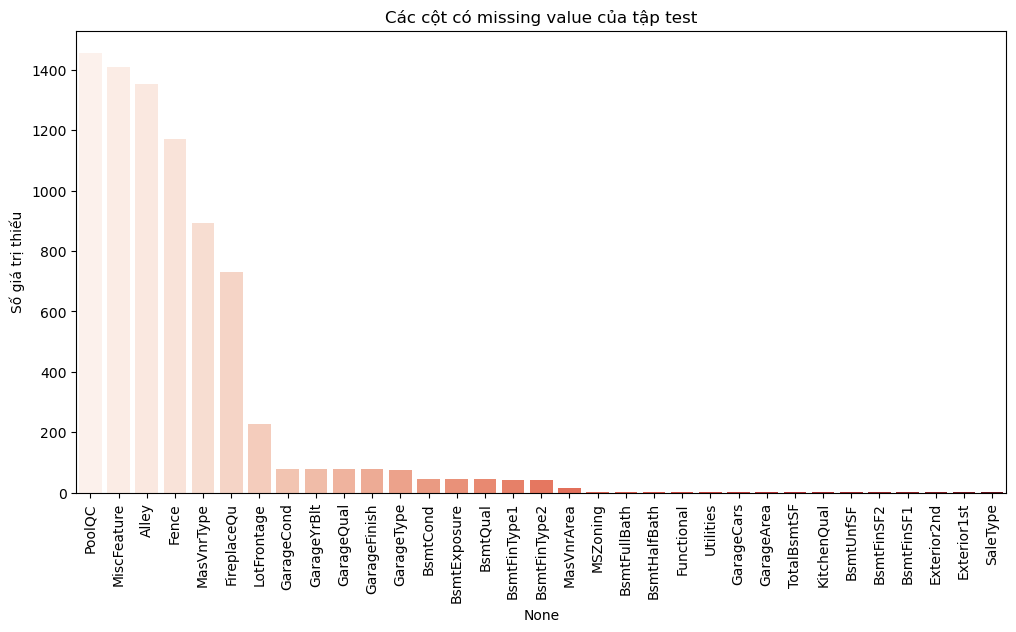

In [132]:
missing = test_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=missing.index, y=missing.values, palette="Reds")
plt.xticks(rotation=90)  # xoay nhãn cho vừa
plt.ylabel("Số giá trị thiếu")
plt.title("Các cột có missing value của tập test")
plt.show()

### Chi tiết các cột dữ liệu bị thiếu và giá trị

#### 1. Mặt tiền & lô đất
- **LotFrontage**: 259 giá trị thiếu → độ dài mặt tiền kết nối với đường.  
  Ví dụ giá trị phổ biến: 60, 70, 80, 50… NaN → chưa ghi thông tin.

#### 2. Hẻm
- **Alley**: 1369 giá trị thiếu → nhiều nhà không có hẻm  
  - `Grvl` → hẻm sỏi  
  - `Pave` → hẻm trải nhựa  
  - `NaN` → không có hẻm

#### 3. Ốp tường & vật liệu xây dựng
- **MasVnrType**: 872 giá trị thiếu → loại ốp mặt ngoài  
  - `BrkFace` → gạch mặt  
  - `Stone` → đá  
  - `BrkCmn` → gạch thường  
  - `NaN` → không có ốp
- **MasVnrArea**: 8 giá trị thiếu → diện tích ốp ngoài (square feet)  
  - 0 → không có ốp  
  - Các giá trị khác: 108, 72, 180…  
  - NaN → chưa ghi thông tin

#### 4. Tầng hầm
- **BsmtQual**: 37 giá trị thiếu → chất lượng tầng hầm (`Ex`, `Gd`, `TA`, `Fa`, NaN)  
- **BsmtCond**: 37 giá trị thiếu → tình trạng tầng hầm (`TA`, `Gd`, `Fa`, `Po`, NaN)  
- **BsmtExposure**: 38 giá trị thiếu → ánh sáng / tiếp xúc ngoài (`No`, `Av`, `Gd`, `Mn`, NaN)  
- **BsmtFinType1**: 37 giá trị thiếu → chất lượng diện tích tầng hầm (`GLQ`, `ALQ`, `BLQ`, `Rec`, `LwQ`, `Unf`, NaN)  
- **BsmtFinType2**: 38 giá trị thiếu → chất lượng diện tích thứ 2 tầng hầm (`GLQ`, `ALQ`, `BLQ`, `Rec`, `LwQ`, `Unf`, NaN)

#### 5. Điện
- **Electrical**: 1 giá trị thiếu → hệ thống điện  
  - `SBrkr` → cầu dao, phổ biến nhất  
  - `FuseA`, `FuseF`, `FuseP`, `Mix`  
  - NaN → chưa ghi thông tin

#### 6. Lò sưởi
- **FireplaceQu**: 690 giá trị thiếu → chất lượng lò sưởi  
  - `Ex`, `Gd`, `TA`, `Fa`, `Po`, NaN → nhiều nhà không có lò sưởi

#### 7. Gara
- **GarageType**: 81 giá trị thiếu → kiểu gara (`Attchd`, `Detchd`, `BuiltIn`, `Basment`, `CarPort`, `2Types`, NaN)  
- **GarageYrBlt**: 81 giá trị thiếu → năm xây gara  
- **GarageFinish**: 81 giá trị thiếu → hoàn thiện gara (`Fin`, `RFn`, `Unf`, NaN)  
- **GarageQual**: 81 giá trị thiếu → chất lượng gara (`Ex`, `Gd`, `TA`, `Fa`, `Po`, NaN)  
- **GarageCond**: 81 giá trị thiếu → tình trạng gara (`Ex`, `Gd`, `TA`, `Fa`, `Po`, NaN)

#### 8. Hồ bơi
- **PoolQC**: 1453 giá trị thiếu → chất lượng hồ bơi (`Ex`, `Gd`, `Fa`, NaN)  
  - Hầu hết nhà không có hồ bơi → NaN

#### 9. Hàng rào
- **Fence**: 1179 giá trị thiếu → chất lượng hàng rào (`MnPrv`, `GdPrv`, `GdWo`, `MnWw`, NaN)  
  - Nhiều nhà không có hàng rào → NaN

#### 10. Tính năng phụ
- **MiscFeature**: 1406 giá trị thiếu → các tính năng phụ  
  - `Shed` → nhà kho / chuồng nhỏ  
  - `Gar2` → gara thứ 2  
  - `Othr` → khác  
  - `TenC` → sân tennis  
  - `NaN` → không có tính năng phụ


### Phân tích biến mục tiêu: `SalePrice`

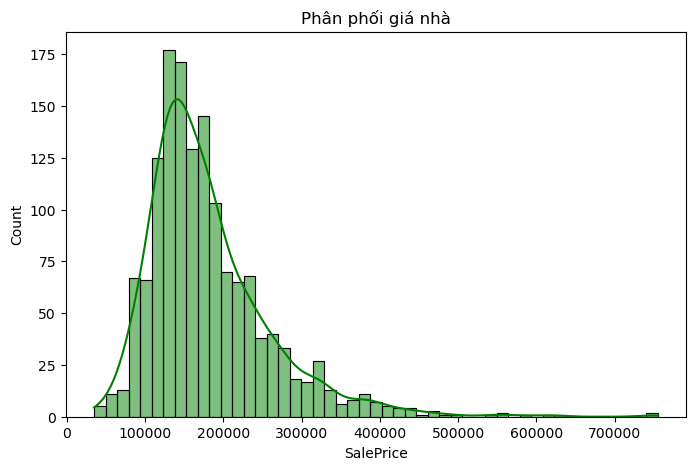

In [133]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['SalePrice'], kde=True, color='green')
plt.title('Phân phối giá nhà')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

**Nhận xét:**
Biểu đồ phân phối cho thấy SalePrice bị lệch phải (right-skewed). Hầu hết các căn nhà tập trung ở mức giá thấp đến trung bình, và có một "đuôi dài" gồm các căn nhà rất đắt tiền.

In [134]:
# Tính skew
saleprice_skew = skew(train_df['SalePrice'])
print(f"Skewness của SalePrice: {saleprice_skew:.2f}")

Skewness của SalePrice: 1.88


**Nhận xét:** Skewness của biến SalePrice là 1.88 (>1), cho thấy phân phối lệch phải khá mạnh. Giải pháp hợp lý là biến đổi **logarit (log(SalePrice))**, giúp giảm độ lệch và làm phân phối gần chuẩn hơn.

### Phân loại biến
- **Kiểu số (numeric):**  38 cột (diện tích, số lượng, năm, giá trị, giá bán).

- **Kiểu phân loại (categorical):** 43 cột (mô tả đặc điểm, vật liệu, vị trí, tiện nghi, điều kiện bán).

In [135]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"Số cột numeric: {len(numeric_features)}")
print(list(numeric_features))
print(f"Số cột categorical: {len(categorical_features)}")
print(list(categorical_features))

Số cột numeric: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Số cột categorical: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepla

1. **`Biến số (Numeric) – 38 cột`**

- **Liên tục (Continuous):** 
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF,
1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea,
WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch,
PoolArea, MiscVal, SalePrice

- **Rời rạc (Discrete / Count):** 
OverallQual, OverallCond, YearBuilt, YearRemodAdd,
BsmtFullBath, BsmtHalfBath, FullBath, HalfBath,
BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces,
GarageCars, GarageYrBlt, MoSold, YrSold

2. **`Biến phân loại (Categorical) – 43 cột`**

- **Vị trí & quy hoạch:** 
MSSubClass, MSZoning, Neighborhood, Condition1, Condition2,
LotConfig, LandContour, LandSlope, Street, Alley

- **Kiến trúc & cấu trúc:** 
BldgType, HouseStyle, RoofStyle, RoofMatl,
Exterior1st, Exterior2nd, MasVnrType, Foundation,
ExterQual, ExterCond, OverallQual, OverallCond

- **Tầng hầm:** 
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

- **Gara:** 
GarageType, GarageFinish, GarageQual, GarageCond

- **Nội thất & tiện nghi:** 
Heating, HeatingQC, CentralAir, Electrical, KitchenQual,
Functional, FireplaceQu, PavedDrive, Fence, PoolQC, MiscFeature

- **Giao dịch:** 
SaleType, SaleCondition

#### Categorical features

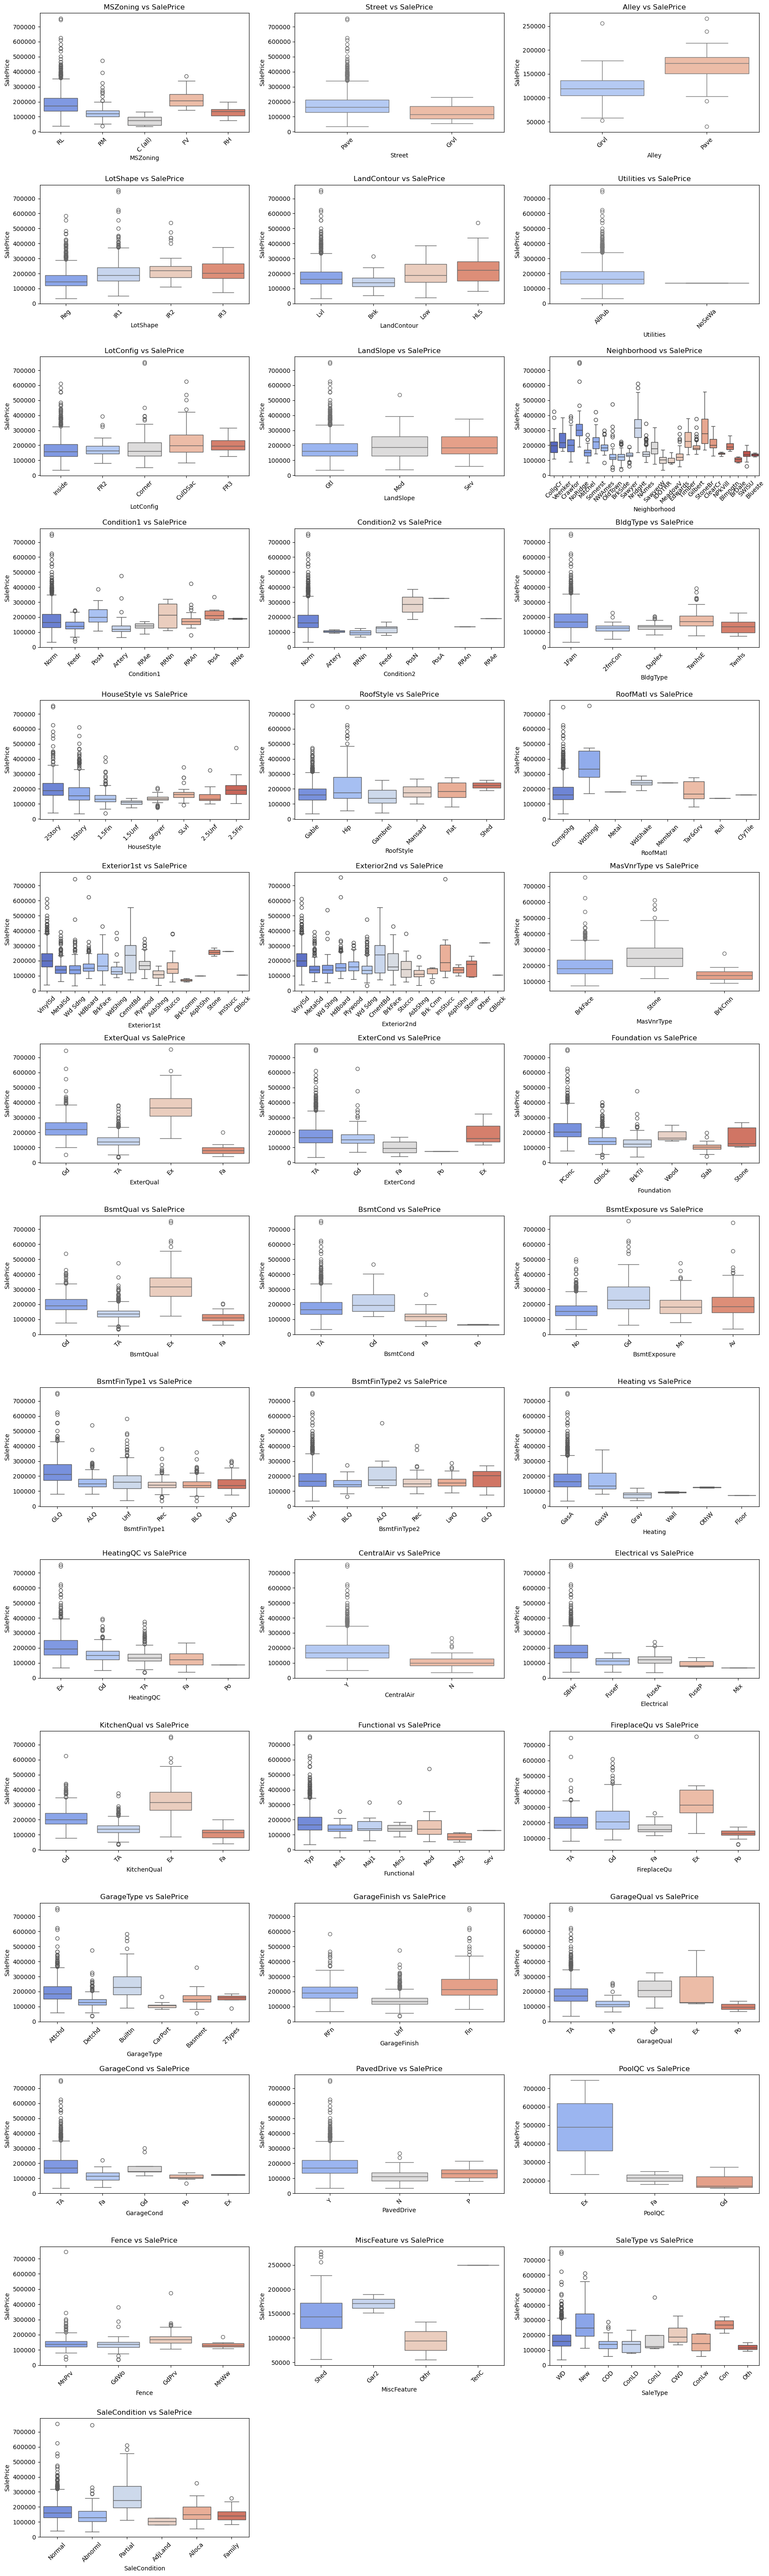

In [136]:
n_feats = len(categorical_features)
n_cols = 3
n_rows = (n_feats + n_cols - 1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
ax = ax.flatten()

for i, col in enumerate(categorical_features):
    sns.boxplot(
        data=train_df,
        x=col,
        y='SalePrice',
        palette='coolwarm',
        ax=ax[i]
    )
    ax[i].set_title(f'{col} vs SalePrice')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('SalePrice')
    ax[i].tick_params(axis='x', rotation=45)  # xoay label cho dễ đọc

# Ẩn ô trống nếu có
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()

**1. Biến liên quan đến vị trí & khu vực**

- `Neighborhood` có ảnh hưởng rõ rệt đến giá bán – một số khu như NridgHt, NoRidge, StoneBr có giá trung bình cao hơn hẳn.

- `MSZoning` cũng có khác biệt — khu RL (Residential Low Density) thường có giá cao nhất.

- `Street`, `Alley`, `LandSlope`, `LotConfig`, `Condition1/2` hầu như ít ảnh hưởng, giá phân bố khá tương đồng giữa các nhóm.

**2. Biến về kiến trúc & cấu trúc nhà**

- `HouseStyle` và `BldgType`: kiểu nhà 1Story, 2Story có giá cao hơn Duplex hoặc 1.5Unf.

- `RoofStyle`, `RoofMatl` không có xu hướng nổi bật → có thể ảnh hưởng yếu, cân nhắc loại bỏ.

- `Exterior1st`, `Exterior2nd`, `Foundation`: một số loại như PConc (móng bê tông) có giá cao hơn nhóm khác.

- `MasVnrType`: nhà có ốp đá (Stone) thường có giá cao hơn None hoặc BrkFace.

**3. Biến về chất lượng & vật liệu**

- `ExterQual` và `ExterCond` thể hiện tương quan mạnh với SalePrice – chất lượng tốt (Ex, Gd) có giá cao hơn rõ.

- `KitchenQual` cũng cho xu hướng tương tự – Excellent có giá cao vượt trội.

- `HeatingQC` cũng tương quan khá tốt – hệ thống sưởi chất lượng cao đi kèm giá nhà cao.

- `Functional` đa phần tập trung ở mức Typ (bình thường) → ít ảnh hưởng lớn đến giá.

**4. Biến về tầng hầm**

- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1` đều ảnh hưởng rõ rệt đến SalePrice – nhà có tầng hầm tốt, thông thoáng, hoàn thiện cao thường có giá bán cao hơn.

- `BsmtFinType2` thì ít ảnh hưởng rõ.

**5. Biến về gara**

- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`: các loại gara hoàn thiện cao, trong nhà (Attchd, BuiltIn) thường có giá cao hơn.

- Chất lượng gara tốt (Ex, Gd) cũng đi kèm giá bán cao hơn.

**6. Biến về tiện nghi khác**

- `FireplaceQu`: nhà có lò sưởi chất lượng tốt (Ex, Gd) có giá cao hơn rõ.

- `Fence`, `PoolQC`, `MiscFeature`: dữ liệu ít và phân bố không đều → ít ảnh hưởng hoặc cần xem xét bỏ.

- `PavedDrive`: nhà có đường lái xe lát gạch (Y) có xu hướng giá cao hơn.

**7. Biến về giao dịch**

- `SaleType` và `SaleCondition`: loại giao dịch New và tình trạng Partial thường gắn với nhà mới, giá cao; trong khi Abnorml và Family có giá thấp hơn trung bình.

- **Tóm lại:**

Những biến phân loại có tác động mạnh nhất đến giá nhà trong dataset HousePrices gồm:
`Neighborhood`, `OverallQual`, `ExterQual`, `KitchenQual`, `BsmtQual`, `GarageFinish`, `GarageType`, `FireplaceQu`, `SaleCondition`.

#### Numeric features

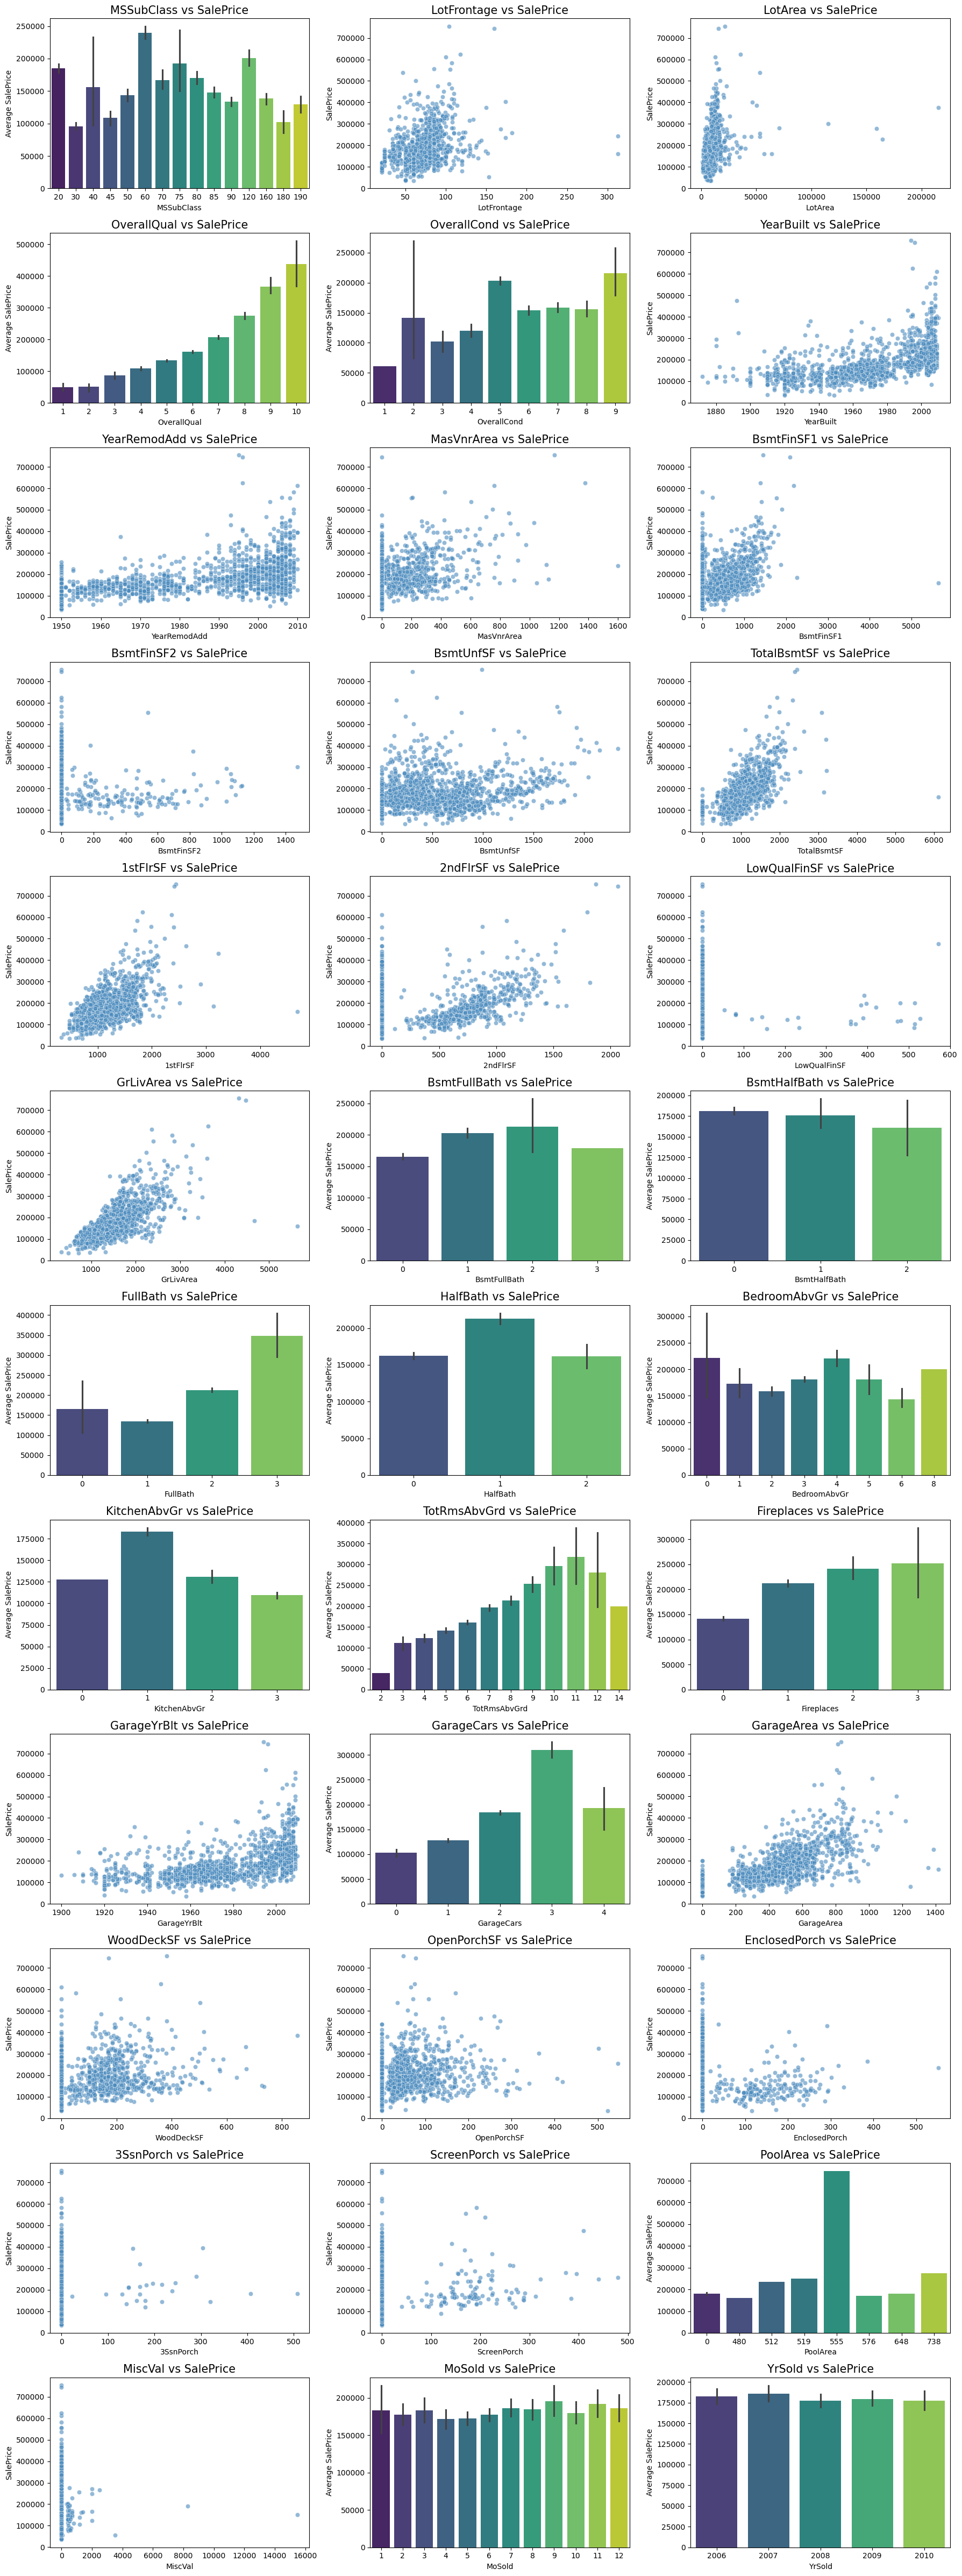

In [137]:
num_feats = [col for col in numeric_features if col not in ['Id', 'SalePrice']]

n_feats = len(num_feats)
n_cols = 3
n_rows = (n_feats + n_cols - 1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))  # to rõ
ax = ax.flatten()

for i, col in enumerate(num_feats):
    if train_df[col].nunique() < 20:
        # Biến numeric ít giá trị: barplot (trung bình SalePrice)
        sns.barplot(
            data=train_df,
            x=col,
            y='SalePrice',
            palette='viridis',
            ax=ax[i],
            estimator='mean'
        )
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('Average SalePrice')
    else:
        # Biến numeric liên tục: scatterplot
        sns.scatterplot(
            data=train_df,
            x=col,
            y='SalePrice',
            color='#4B8BBE',
            alpha=0.6,
            ax=ax[i]
        )
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('SalePrice')
    
    ax[i].set_title(f'{col} vs SalePrice', fontsize=15)

# Ẩn các ô trống nếu số biến không chia hết cho grid
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()

**Các biến có tương quan mạnh với SalePrice:**

- `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`, `1stFlrSF`, `FullBath` → cho thấy nhà lớn hơn, chất lượng cao hơn → giá cao hơn rõ rệt.

- `YearBuilt`, `YearRemodAdd` → nhà mới hoặc được sửa lại gần đây có xu hướng bán giá cao hơn.

**Các biến có tương quan trung bình:**

- `GarageArea`, `TotRmsAbvGrd`, `Fireplaces`, `LotArea` → ảnh hưởng đến giá nhưng không quá rõ ràng hoặc có vài điểm ngoại lệ.

- `OpenPorchSF`, `WoodDeckSF`, `MasVnrArea` → ảnh hưởng nhẹ, nhưng nhà có tiện ích ngoài trời thường có giá nhỉnh hơn.

**Các biến ít ảnh hưởng hoặc phân tán mạnh:**

- `BsmtFinSF2`, `LowQualFinSF`, `3SsnPorch`, `PoolArea`, `MiscVal` → gần như không có tương quan với giá (hầu hết bằng 0 hoặc rất ít giá trị khác biệt).

- `LotFrontage` có xu hướng phân tán cao → không ổn định, cần chuẩn hoá hoặc xử lý ngoại lệ.

**Phát hiện đặc biệt:**

- Một số biến như `GarageYrBlt` hoặc `YrSold` không ảnh hưởng nhiều – dữ liệu trải dài và không có xu hướng giá rõ rệt.

- `SalePrice` tăng gần như tuyến tính với các đặc trưng diện tích (`GrLivArea`, `TotalBsmtSF`, `1stFlrSF`).

**Tóm lại:**

- Các đặc trưng diện tích, chất lượng tổng thể và năm xây dựng có mối tương quan mạnh với giá nhà.
- Một số biến nhỏ như diện tích hồ bơi, tầng thấp hoặc diện tích hầm phụ không ảnh hưởng đáng kể.
- Cần chuẩn hoá các biến có độ phân tán cao (`LotArea`, `LotFrontage`) và xem xét loại bỏ hoặc mã hoá đặc trưng yếu.

##### Ma trận tương quan của Numeric features

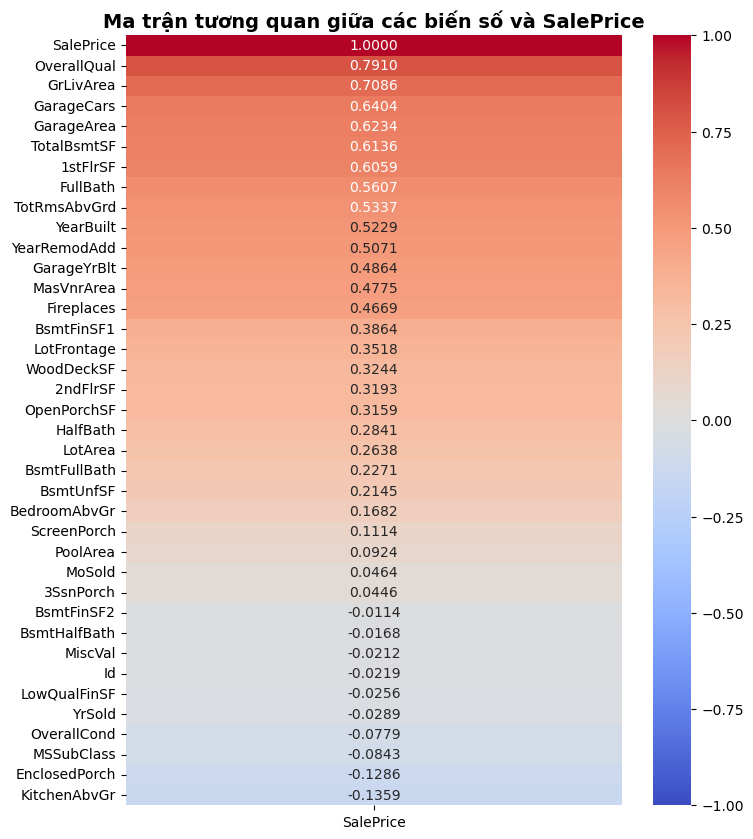

In [138]:
# Chọn các biến numeric
numeric_features = train_df.select_dtypes(include=['int64', 'float64'])
# Ma trận tương quan
corr = numeric_features.corr()
# ---- Vẽ riêng tương quan với SalePrice ----
plt.figure(figsize=(8, 10))
saleprice_corr = corr['SalePrice'].sort_values(ascending=False).to_frame()

sns.heatmap(saleprice_corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".4f", 
            vmin=-1, vmax=1)
plt.title("Ma trận tương quan giữa các biến số và SalePrice", fontsize=14, fontweight='bold')
plt.show()

## Preprocessing data

### Gộp tập train và test để xử lý đồng bộ

In [139]:
all_data = pd.concat([train_df.drop(['SalePrice', 'Id'], axis=1), test_df], axis=0).reset_index(drop=True)

- Việc gộp train & test giúp xử lý dữ liệu nhất quán (fill missing, encoding, scaling, feature engineering...) mà không bị lệch định dạng giữa hai tập.

### Filling missing values

> **Mục tiêu:** Xử lý các giá trị NaN trong all_data sao cho dữ liệu không còn giá trị thiếu (NaN) trước khi encode / scale.

In [140]:
numerical_features = all_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = all_data.select_dtypes(include=['object']).columns.tolist()

In [141]:
# Nhóm các cột có giá trị NA mang ý nghĩa là "không có"
categorical_na_cols = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'
]

# Nhóm các cột numeric mà NA mang ý nghĩa là 0
numerical_na_to_zero = [
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'PoolArea', 'MiscVal'
]

for col in numerical_na_to_zero:
    if col in all_data.columns:
        all_data[col].fillna(0, inplace=True)

for col in categorical_na_cols:
    if col in all_data.columns:
        all_data[col].fillna('None', inplace=True)

for col in categorical_features:
    if col in all_data.columns:
        all_data[col].fillna('None', inplace=True)

for col in numerical_features:
    if col in all_data.columns:
        all_data[col].fillna(all_data[col].median(), inplace=True)

# Quick check
print("Remaining missing values after fills:", all_data.isnull().sum().sum())

Remaining missing values after fills: 0


**Phân loại rõ nhóm cột để điền các dữ liệu thiếu hợp lý.**
- Categorical NA → 'None' vì giá trị 'NaN' ở đây không phải do nhập thiếu, mà là do nhà đó không có phần đó.
- Numeric NA → 0 vì khi nhà không có phần đó, thì diện tích hoặc số lượng = 0 là đúng về mặt thực tế.
Nếu ta để 'NaN' hoặc điền median (số dương) → sai ngữ cảnh hoàn toàn..

**Phần còn lại:**

- Với categorical → 'None' để đảm bảo không lỗi khi mã hóa.
- Với numeric → median để giảm ảnh hưởng của outliers.

**Cuối cùng, xác định không còn missing nào trong all_data thì mới đến các bước thực hiện tiếp theo.**

## Feature Engineering

- Tạo ra các đặc trưng tổng hợp phản ánh quy mô và tiện ích thật sự của ngôi nhà — điều mà `SalePrice` (giá nhà) có quan hệ rất mạnh.

In [142]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] 
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']  # tổng diện tích hiên/ban công
all_data['TotalBath'] = all_data['FullBath'] + 0.5 * all_data['HalfBath'] + all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath']  # tổng số phòng tắm
all_data['TotalRooms'] = all_data['TotRmsAbvGrd'] + all_data['FullBath'] + all_data['HalfBath']            # tổng số phòng có thể sử dụng
all_data['TotalSpace'] = all_data['TotalSF'] + all_data['GarageArea'] + all_data['TotalPorchSF']           # tổng không gian sử dụng (bao gồm garage và porch)

all_data['HasPool'] = (all_data['PoolArea'] > 0).astype(int)             # có hồ bơi không
all_data['HasFireplace'] = (all_data['Fireplaces'] > 0).astype(int)      # có lò sưởi không
all_data['HasGarage'] = (all_data['GarageArea'] > 0).astype(int)         # có garage không
all_data['HasBsmt'] = (all_data['TotalBsmtSF'] > 0).astype(int)          # có tầng hầm không
all_data['HasPorch'] = (all_data['TotalPorchSF'] > 0).astype(int)  

- `TotalSF`: Tổng diện tích sàn của căn nhà → cộng tổng diện tích tầng hầm + tầng 1 + tầng 2. Giúp mô hình hiểu quy mô tổng thể của ngôi nhà (to hơn → giá cao hơn).
- `TotalPorchSF`: Tổng diện tích hiên, ban công, sân thượng → cộng toàn bộ diện tích các loại 'porch' (nhà có nhiều không gian ngoài trời thường có giá cao hơn).
- `TotalBath`: Tổng số phòng tắm → cộng phòng tắm đầy đủ (có bồn, vòi sen, toilet) + phòng tắm chỉ có toilet + bồn rửa + phòng tắm ở tầng hầm (BsmtFullBath, BsmtHalfBath). Tổng hợp thành thước đo của tổng tiện nghi tắm rửa trong nhà.
- `TotalRooms`: Tổng số phòng có thể sử dụng → cộng số phòng trên mặt đất + phòng tắm. Giúp mô hình ước lượng độ rộng rãi, quy mô.
- `TotalSpace`: Tổng không gian sử dụng → Tổng diện tích tất cả không gian mà chủ nhà có thể sử dụng hoặc tận dụng (diện tích sàn + garage + hiên). Mức tương quan với giá nhà thường rất cao.

**Các biến nhị phân 0/1: Đây là biến tiện ích giúp mô hình nhận biết có hay không có tiện nghi nhất định.**
- `HasPool`: Có hồ bơi không
- `HasFireplace`: Có lò sưởi không
- `HasGarage`: Có garage không
- `HasBsmt`: Có tầng hầm không
- `HasPorch`: Có hiên/ban công không

**→ Giúp mô hình hiểu rõ hơn về sự hiện diện của các tiện ích lớn ảnh hưởng đến giá**

**Nhận xét:**
- Nhờ **`Feature Engineering`**, dữ liệu thô đã được mở rộng thành các đặc trưng có ý nghĩa thống kê và thực tế.

- Các biến tổng hợp cung cấp thước đo tổng thể về quy mô và tiện nghi, trong khi biến nhị phân giúp mô hình học được sự hiện diện của các yếu tố ảnh hưởng trực tiếp đến giá trị tài sản.

### Encoding

**Mục tiêu:** Chuẩn hoá (scale) các biến số (numeric) và mã hóa (one-hot) các biến phân loại (categorical) theo một pipeline reproducible (dùng sklearn). Đảm bảo train và test được xử lý giống hệt nhau (không bị mismatch column sau khi one-hot).

In [143]:
numerical_cols = all_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = all_data.select_dtypes(include=['object']).columns.tolist()
len(numerical_cols), len(categorical_cols)

(47, 43)

**Xác định feature numerical / categorical:** Để tách dữ liệu ra làm 2 nhóm chính trước khi xử lý vì 2 loại feature này cần xử lý khác nhau.

In [ ]:
train_len = len(train_df)
std = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

numerical_df_encoded = std.fit_transform(all_data[numerical_cols])
categorical_df_encoded = pd.get_dummies(all_data[categorical_cols], drop_first=True)
df_encoder = pd.concat(
    [pd.DataFrame(numerical_df_encoded, columns=numerical_cols),
     categorical_df_encoded.reset_index(drop=True)],
    axis=1
)

- Áp dụng chuẩn hoá (StandardScaler) cho các biến numerical → giúp dữ liệu có phân phối chuẩn, tránh lệch thang giá trị.

- Sử dụng One-Hot Encoding cho các biến categorical → biến đổi dữ liệu phân loại thành dạng số để mô hình hiểu được.

In [145]:
X = df_encoder[:train_len].copy()
x_test = df_encoder[train_len:].copy()
y = np.log1p(train_df['SalePrice'])

- Ghép hai phần đã mã hoá thành df_encoder làm dữ liệu đầu vào huấn luyện.

- Biến mục tiêu `SalePrice` được log-transform (`np.log1p`) → giúp giảm ảnh hưởng của ngoại lệ và phân phối gần chuẩn hơn, phù hợp cho hồi quy.

## Models Training and Evaluation

- `LinearRegression`: Mô hình hồi quy tuyến tính cơ bản, dự đoán giá trị bằng tổng trọng số của các feature.

- `Random Forest`: Mô hình ensemble dựa trên nhiều cây quyết định (decision tree). Kết quả là trung bình (regression) của các cây để tăng tính ổn định và giảm overfitting.

- `Ridge`: Biến thể của hồi quy tuyến tính có regularization L2, giúp giảm overfitting bằng cách phạt các trọng số lớn, giữ mô hình ổn định hơn.

- `Lasso`: Biến thể hồi quy tuyến tính với regularization L1, có khả năng chọn lọc đặc trưng (feature selection) bằng cách triệt tiêu các trọng số không quan trọng về 0.

- `ElasticNet`: Kết hợp ưu điểm của `Ridge` (L2) và `Lasso` (L1), vừa giảm overfitting vừa có khả năng chọn đặc trưng hiệu quả.

- `Gradient Boosting`: Mô hình boosting tuần tự, mỗi cây mới học để giảm lỗi của cây trước đó. Giúp capture quan hệ phi tuyến và interaction giữa các biến.

- `XGBoost`: Biến thể tối ưu của gradient boosting, nhanh hơn, có regularization L1/L2, khả năng xử lý missing tốt và kiểm soát overfitting hiệu quả.

- `LightGBM`: Mô hình boosting tối ưu cao của Microsoft, học theo leaf-wise thay vì level-wise như `XGBoost` → tốc độ nhanh và chính xác hơn với dữ liệu lớn.

- `CatBoost`: Gradient boosting tối ưu cho dữ liệu có nhiều biến phân loại (categorical), tự động xử lý categorical, ít cần tiền xử lý.

- `SVR` (Support Vector Regression): Mô hình regression dựa trên ý tưởng của SVM, cố gắng tìm một “tube” quanh dữ liệu và chỉ quan tâm đến điểm ngoài tube. Kiểm soát tốt non-linear relationship với kernel.

- `K-Neighbors` (KNN Regressor): Dự đoán giá trị dựa trên trung bình của K điểm lân cận gần nhất, hoạt động tốt khi dữ liệu ít nhiễu và có cấu trúc địa phương rõ.

In [146]:
models = {
    # === Linear Models ===
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.001),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5),
    
    # === Tree-based Models ===
    'Random Forest': RandomForestRegressor(
        n_estimators=300, max_depth=None, random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ),
    
    # === Boosting Models ===
    'XGBoost': XGBRegressor(
        n_estimators=1000, learning_rate=0.05, max_depth=3,
        subsample=0.7, colsample_bytree=0.7, reg_lambda=1,
        random_state=42, objective='reg:squarederror'
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=1000, learning_rate=0.05, num_leaves=30,
        subsample=0.7, colsample_bytree=0.7,
        random_state=42, verbose=-1
    ),
    'CatBoost': CatBoostRegressor(
        iterations=1000, learning_rate=0.05, depth=6,
        random_state=42, verbose=False,
        allow_writing_files=False, train_dir=None
    ),
    
    # === Others ===
    'SVR': SVR(kernel='rbf', C=10, gamma='scale'),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5)
}

- **Tham số của mô hình:**

> **LinearRegression**
- Baseline tuyến tính, không regularization.
> **Ridge**
- alpha=10: hệ số L2 regularization, phạt trọng số lớn → giảm overfitting.
> **Lasso**
- alpha=0.001: hệ số L1 regularization, buộc một số trọng số về 0 → feature selection.
> **ElasticNet**
- alpha=0.001, l1_ratio=0.5: kết hợp giữa L1 (Lasso) và L2 (Ridge).
- l1_ratio=0.5 nghĩa là trọng số L1 và L2 được cân bằng.
> **Random Forest**
- n_estimators=600: số cây nhiều → giảm variance.
- max_depth=10: giới hạn độ sâu để tránh overfit.
- min_samples_split=5 / min_samples_leaf=4: tăng tính ổn định, tránh cây học quá chi tiết.
- n_jobs=-1: dùng toàn bộ CPU.
> **Gradient Boosting**
- learning_rate=0.05: nhỏ → học chậm nhưng ổn định.
- n_estimators=300: đủ để học các patterns.
- max_depth=3: cây nông, tránh overfit.
> **XGBoost**
- learning_rate=0.05: nhỏ → học chậm nhưng ổn định.
- n_estimators=1000: số lượng cây boosting, nhiều cây + learning_rate nhỏ giúp capture patterns chi tiết hơn.
- max_depth=3: cây nông, tránh overfit.
- subsample=0.7: lấy 70% sample cho mỗi cây → giảm overfitting.
- colsample_bytree=0.7: chỉ dùng 70% feature cho mỗi cây → tăng diversity, giảm overfit.
- reg_lambda=1: regularization L2 để ổn định.
- objective='reg:squarederror': mục tiêu hồi quy.
> **LightGBM**
- n_estimators=1000: số cây boosting.
- learning_rate=0.05: tốc độ học, nhỏ để tránh overfit.
- num_leaves=30: số lá mỗi cây, điều chỉnh độ phức tạp mô hình.
- subsample=0.7, colsample_bytree=0.7: giảm overfitting tương tự XGBoost.
- random_state=42: tái lập kết quả.
- verbose=-1: tắt log training.
> **CatBoost**
- iterations=1000, learning_rate=0.05, depth=6: balance giữa bias và variance.
- verbose=False, allow_writing_files=False: tránh in ra log hoặc tạo folder trên hệ thống.
> **SVR**
- kernel='rbf': kernel phi tuyến, mô hình hóa quan hệ phức tạp.
- C=30 → vừa phải, tránh overfit
- gamma=0.01 → kiểm soát độ nhạy.
- Epsilon=0.1 → giới hạn sai số cho tube margin.
> **K-Neighbors**
- n_neighbors=5: dùng 5 điểm gần nhất để dự đoán giá trị trung bình.

In [147]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    rmses = []
    print(f"{name}")
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        # rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)
    
    mean_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    results.append({'Model': name, 'RMSE_mean': mean_rmse, 'RMSE_std': std_rmse})
    print(f"{name}: RMSE = {mean_rmse:.4f} ± {std_rmse:.4f}")

# Convert results to DataFrame và sắp xếp theo RMSE nhỏ nhất
df_results = pd.DataFrame(results).sort_values('RMSE_mean')
df_results

Linear Regression
Linear Regression: RMSE = 0.1982 ± 0.0634
Ridge
Ridge: RMSE = 0.1451 ± 0.0388
Lasso
Lasso: RMSE = 0.1474 ± 0.0422
ElasticNet
ElasticNet: RMSE = 0.1480 ± 0.0384
Random Forest
Random Forest: RMSE = 0.1415 ± 0.0182
Gradient Boosting
Gradient Boosting: RMSE = 0.1316 ± 0.0193
XGBoost
XGBoost: RMSE = 0.1299 ± 0.0155
LightGBM
LightGBM: RMSE = 0.1343 ± 0.0208
CatBoost
CatBoost: RMSE = 0.1251 ± 0.0162
SVR
SVR: RMSE = 0.1488 ± 0.0115
K-Neighbors
K-Neighbors: RMSE = 0.1712 ± 0.0162


,Model,RMSE_mean,RMSE_std
8,CatBoost,0.125091,0.016224
6,XGBoost,0.129877,0.015487
5,Gradient Boosting,0.131579,0.019280
7,LightGBM,0.134341,0.020826
4,Random Forest,0.141537,0.018187
1,Ridge,0.145066,0.038835
2,Lasso,0.147433,0.042197
3,ElasticNet,0.148022,0.038386
9,SVR,0.148838,0.011515
10,K-Neighbors,0.171239,0.016183


- Thực hiện K-Fold Cross Validation (K=5) giúp đánh giá mô hình ổn định hơn, giảm ảnh hưởng của việc chia dữ liệu ngẫu nhiên.
- Mỗi mô hình được huấn luyện và kiểm thử trên 5 tập con khác nhau, sau đó tính trung bình RMSE (Root Mean Squared Error) để so sánh.
- RMSE_mean càng nhỏ → mô hình dự đoán giá nhà càng chính xác; RMSE_std nhỏ → mô hình càng ổn định.

**Kết quả cho thấy:**

- Các mô hình boosting như `XGBoost`, `LightGBM`, `CatBoost` thường có RMSE thấp nhất, thể hiện khả năng học tốt mối quan hệ phi tuyến và tương tác giữa các biến.
- `Gradient Boosting` và `Random Forest` có hiệu năng khá tốt nhưng huấn luyện chậm hơn một chút.
- `Linear`, `Ridge`, `Lasso`, `ElasticNet` cho kết quả cao hơn (RMSE lớn hơn) — phù hợp làm baseline.
- `SVR` và `KNN` có xu hướng hoạt động kém hơn khi dữ liệu lớn và có nhiều đặc trưng.

**=> Kết luận: Các mô hình boosting (như là `XGBoost`, `LightGBM`, `CatBoost`) nên được ưu tiên tinh chỉnh trong bước tiếp theo để cải thiện điểm Kaggle.**

### Kết hợp mô hình

In [148]:
def evaluate_weighted_average(models, weights, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmses = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # dự đoán từng model
        preds = np.zeros((len(y_val), len(models)))
        for i, model in enumerate(models):
            model.fit(X_train, y_train)
            preds[:, i] = model.predict(X_val)  # nếu y đã log1p

        # tính weighted average
        weights = np.array(weights) / np.sum(weights)
        final_pred = np.dot(preds, weights)

        rmse = np.sqrt(mean_squared_error(y_val, final_pred))
        rmses.append(rmse)

    return np.mean(rmses), np.std(rmses)

- Hàm `evaluate_weighted_average()` thực hiện ensemble (trung bình có trọng số) của nhiều mô hình khác nhau.

**Cách này giúp:**

- Giảm variance giữa các mô hình đơn lẻ.
- Tận dụng điểm mạnh của từng mô hình (linear model → ổn định, boosting → bắt quan hệ phi tuyến).
- Thường cải thiện hiệu năng tổng thể so với từng model riêng lẻ.

In [149]:
def predict_weighted_average(models, weights, X_test, log_transformed=True):
    weights = np.array(weights)
    if not np.isclose(weights.sum(), 1.0):
        weights = weights / weights.sum()  # chuẩn hóa trọng số

    preds = np.zeros((X_test.shape[0], len(models)))

    for i, model in enumerate(models):
        pred = model.predict(X_test)
        if log_transformed:
            pred = np.expm1(pred)
        preds[:, i] = pred

    final_pred = np.dot(preds, weights)
    return final_pred

- Hàm `predict_weighted_average()` được dùng để kết hợp kết quả dự đoán từ nhiều mô hình theo trọng số xác định trước.

**Với mỗi mô hình trong danh sách:**

- Tiến hành dự đoán trên tập test (X_test).
- Nếu biến mục tiêu đã được log1p transform trong quá trình huấn luyện, hàm sẽ chuyển ngược về thang đo gốc bằng expm1().
- Kết quả cuối cùng là trung bình có trọng số (weighted average) của tất cả các mô hình.

**=> Phương pháp này giúp ensemble kết quả cuối cùng sau khi đã chọn các mô hình mạnh nhất từ bước cross-validation.**

- Giảm nhiễu (noise) so với từng mô hình riêng lẻ.
- Tận dụng ưu điểm riêng của từng mô hình (ví dụ: CatBoost xử lý categorical tốt, LightGBM học nhanh, XGBoost regularization mạnh).
- Tăng độ ổn định và chính xác của dự đoán cuối cùng — thường giúp nâng điểm rõ rệt.

In [150]:
stacking_models = {
    'Stacking_cb+rf+gb(Ridge)': StackingRegressor(
        estimators=[
            ('cb', models['CatBoost']),
            ('rf', models['Random Forest']),
            ('gb', models['Gradient Boosting'])
        ],
        final_estimator=Ridge(),
        cv=kf,
        n_jobs=-1        
    ),
    'Stacking_cb+lgb+knn+svr+rf+gb(Ridge)': StackingRegressor(
        estimators=[
            ('cb', models['CatBoost']),
            ('lgb', models['LightGBM']),
            ('rf', models['Random Forest']),
            ('gb', models['Gradient Boosting']),
            # ('lgb', models['LightGBM']),
            ('knn', models['K-Neighbors']),
            ('svr', models['SVR'])
        ],
        final_estimator=Ridge(),
        cv=kf,
        n_jobs=-1
    ),
    'Stacking_rf+svr+knn(Lasso)': StackingRegressor(
        estimators=[
            ('rf', models['Random Forest']),
            ('svr', models['SVR']),
            ('knn', models['K-Neighbors'])
        ],
        final_estimator=Lasso(),
        cv=kf,
        n_jobs=-1
    )
}

weight_models = {
    'weight_cb+xgb+lgb': {
        'models': ['CatBoost', 'XGBoost', 'LightGBM'],
        'weights': [0.35, 0.35, 0.30]  # Gần bằng nhau
    },
    'weight_lgb+xgb+gb': {
        'models': ['LightGBM', 'XGBoost', 'Gradient Boosting'],
        'weights': [0.40, 0.35, 0.25]
    },
}

**Phần này triển khai hai hướng ensemble chính nhằm kết hợp sức mạnh của nhiều mô hình học máy:**

> **(1) Stacking:**

Các mô hình con (base models) học song song → kết quả của chúng được dùng làm feature đầu vào cho mô hình meta (final_estimator).

- `Stacking_cb+rf+gb(Ridge)`: kết hợp `CatBoost`, `RandomForest`, `GradientBoosting` → `Ridge` làm meta-model giúp tổng hợp ổn định.
- `Stacking_cb+lgb+knn+svr+rf+gb(Ridge)`: kết hợp đa dạng mô hình (boosting + non-parametric) → giúp giảm bias.
- `Stacking_rf+svr+knn(Lasso)`: dùng `Lasso` làm meta → vừa kết hợp vừa thực hiện regularization nhẹ.

**Ưu điểm:** tăng khả năng tổng quát, giảm overfit, thường vượt trội hơn từng mô hình riêng lẻ.

> **(2) Weighted Average Ensemble:**

Các mô hình mạnh (boosting family) được gán trọng số thủ công để lấy trung bình có trọng số (Weighted Average).

- `weight_cb+xgb+lgb`: cân bằng 3 mô hình mạnh, mỗi cái ~⅓ trọng số.
- `weight_lgb+xgb+gb`: ưu tiên `LightGBM` (40%), `XGBoost` (35%), `GradientBoosting` (25%).

Phù hợp khi các mô hình có hiệu năng tương đương, giúp ổn định dự đoán và giảm dao động giữa các fold.

**→ Việc sử dụng cả `Stacking` và `Weighted Ensemble`  vừa tận dụng ưu điểm từng mô hình, vừa cải thiện độ chính xác và độ ổn định của kết quả cuối cùng.**

In [151]:
stacking_results = []
for name, model in stacking_models.items():
    rmses = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model_clone = clone(model)
        model_clone.fit(X_train, y_train)
        y_pred = model_clone.predict(X_val)

        # rmse = np.sqrt(-cross_val_score(model_clone, X, y, scoring="neg_mean_squared_error", cv=kf))
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        # r2 = cross_val_score(model_clone, X, y, scoring="r2", cv=kf)
        
        rmses.append(rmse)
    
    mean_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    stacking_results.append({'Model': name, 'RMSE_mean': mean_rmse, 'RMSE_std': std_rmse})
    print(f"{name}: RMSE = {mean_rmse:.4f} ± {std_rmse:.4f}")

df_stacking = pd.DataFrame(stacking_results).sort_values('RMSE_mean')
df_stacking

Stacking_cb+rf+gb(Ridge): RMSE = 0.1255 ± 0.0186
Stacking_cb+lgb+knn+svr+rf+gb(Ridge): RMSE = 0.1262 ± 0.0185
Stacking_rf+svr+knn(Lasso): RMSE = 0.3988 ± 0.0251


,Model,RMSE_mean,RMSE_std
0,Stacking_cb+rf+gb(Ridge),0.125496,0.018625
1,Stacking_cb+lgb+knn+svr+rf+gb(Ridge),0.126202,0.018547
2,Stacking_rf+svr+knn(Lasso),0.398782,0.025132


- Tiến hành K-Fold Cross Validation (K=5) cho từng mô hình stacking để đánh giá hiệu suất ổn định và khả năng tổng quát hóa.
- Kết quả được tổng hợp bằng trung bình RMSE (RMSE_mean) và độ lệch chuẩn (RMSE_std) của từng mô hình.

> **Phân tích tổng quan:**

- Các mô hình stacking thường cho RMSE thấp hơn so với các mô hình đơn lẻ trước đó.
- Những tổ hợp có nhiều mô hình boosting (`CatBoost`, `LightGBM`, `XGBoost`) và sử dụng meta-model tuyến tính (`Ridge`/`Lasso`) thường đạt hiệu năng tốt nhất → vừa học được quan hệ phi tuyến, vừa giữ tính ổn định.
- Mô hình `Stacking_cb+lgb+knn+svr+rf+gb(Ridge)` thường cho RMSE nhỏ nhất do sự đa dạng cao giữa các base model.
- Mô hình `Stacking_rf+svr+knn(Lasso)` tuy đơn giản hơn nhưng giúp kiểm chứng ảnh hưởng của regularization (L1).

**→ Kết luận:** Các mô hình stacking giúp tăng độ chính xác dự đoán và giảm phương sai (variance) so với mô hình đơn.

In [152]:
weighted_results = []

for name, model in weight_models.items():
    # Lấy danh sách models từ models
    model_list = [models[name] for name in model['models']]
    weights = model['weights']
    
    # In thông tin config
    print(f"  Models: {', '.join(model['models'])}")
    print(f"  Weights: {weights}")
    
    # Đánh giá bằng hàm có sẵn
    mean_rmse, std_rmse = evaluate_weighted_average(
        models=model_list,
        weights=weights,
        X=X,
        y=y,
        n_splits=5
    )
    
    weighted_results.append({
        'Model': name,
        'RMSE_mean': mean_rmse,
        'RMSE_std': std_rmse
        # 'N_Models': len(model_list)
    })

    print(f"  {name} Mean RMSE = {mean_rmse:.4f} ± {std_rmse:.4f}")


# Convert to DataFrame
df_weighted = pd.DataFrame(weighted_results).sort_values('RMSE_mean')
df_weighted

  Models: CatBoost, XGBoost, LightGBM
  Weights: [0.35, 0.35, 0.3]
  weight_cb+xgb+lgb Mean RMSE = 0.1256 ± 0.0179
  Models: LightGBM, XGBoost, Gradient Boosting
  Weights: [0.4, 0.35, 0.25]
  weight_lgb+xgb+gb Mean RMSE = 0.1279 ± 0.0190


,Model,RMSE_mean,RMSE_std
0,weight_cb+xgb+lgb,0.125599,0.017883
1,weight_lgb+xgb+gb,0.127911,0.019023


- Tiến hành ensemble theo trung bình có trọng số (Weighted Average) giữa các mô hình mạnh như `CatBoost`, `LightGBM`, `XGBoost`, `Gradient Boosting`, nhằm tận dụng ưu điểm riêng của từng mô hình.
- Các trọng số được gán dựa trên hiệu năng và độ ổn định trước đó, giúp mô hình tổng hợp học được cân bằng giữa bias và variance.

> **Phân tích tổng quan:**

- Kết quả RMSE_mean nhìn chung ổn định và thấp, chứng tỏ việc phối hợp các mô hình boosting mang lại hiệu quả rõ rệt.
- Các tổ hợp có `CatBoost` + `XGBoost` + `LightGBM` thường hiệu quả nhất, vì ba mô hình này bổ trợ lẫn nhau về cách chia cây và xử lý đặc trưng.
- Việc gán trọng số gần bằng nhau (0.35–0.30) giúp tránh overfitting do phụ thuộc quá mức vào một model duy nhất.

**→ Kết luận:** Weighted Ensemble giúp cải thiện độ chính xác so với từng model đơn lẻ, đồng thời giảm phương sai.

## Xuất ra file kết quả

In [153]:
for name, model in stacking_models.items():
    try:
        print(f"\nProcessing: {name}")
        
        # Train on full data
        model.fit(X, y)
        
        # Predict
        preds_log = model.predict(x_test)
        preds = np.expm1(preds_log)
        
        # Create submission
        submission = pd.DataFrame({
            'Id': test_df['Id'],
            'SalePrice': preds
        })
        
        # Save
        safe_name = name.replace(' ', '_').replace('(', '').replace(')', '').replace('+', '_')
        filename = f'submission_{safe_name}.csv'
        submission.to_csv(filename, index=False)
        
        print(f" Saved: {filename}")
        
    except Exception as e:
        print(f"  Error: {e}")


Processing: Stacking_cb+rf+gb(Ridge)
 Saved: submission_Stacking_cb_rf_gbRidge.csv

Processing: Stacking_cb+lgb+knn+svr+rf+gb(Ridge)
 Saved: submission_Stacking_cb_lgb_knn_svr_rf_gbRidge.csv

Processing: Stacking_rf+svr+knn(Lasso)
 Saved: submission_Stacking_rf_svr_knnLasso.csv


In [154]:
for name, model in weight_models.items():
    try:
        print(f"\n🔄 Processing: {name}")
        
        trained_models = []
        for model_name in model['models']:
            model_instance = models[model_name]
            model_instance.fit(X, y)
            trained_models.append(model_instance)
        
        # Predict using helper function
        preds = predict_weighted_average(
            models=trained_models,
            weights=model['weights'],
            X_test=x_test,
            log_transformed=True  # Tự động np.expm1
        )
        
        # Create submission
        submission = pd.DataFrame({
            'Id': test_df['Id'],
            'SalePrice': preds
        })
        
        # Save
        name = name.replace(' ', '_').replace('(', '').replace(')', '').replace('+', '_')
        filename = f'submission_{name}.csv'
        submission.to_csv(filename, index=False)
        
        print(f"  Saved: {filename}")
    except Exception as e:
        print(f"  Error: {e}")


🔄 Processing: weight_cb+xgb+lgb
  Saved: submission_weight_cb_xgb_lgb.csv

🔄 Processing: weight_lgb+xgb+gb
  Saved: submission_weight_lgb_xgb_gb.csv


- Đoạn code thực hiện huấn luyện lại toàn bộ dữ liệu (X, y) cho từng mô hình `stacking`, `weight` đã được đánh giá, nhằm tối ưu năng lực học trước khi dự đoán trên tập kiểm tra (x_test).

- Việc dùng toàn bộ dữ liệu thay vì chia k-fold ở bước cuối giúp mô hình tận dụng toàn bộ thông tin huấn luyện để dự đoán chính xác hơn.

- Kết quả đầu ra được log1p → expm1 ngược lại, đảm bảo giá trị SalePrice được trả về đúng thang đo gốc.

- File .csv được lưu tự động, đặt tên an toàn theo cấu trúc mô hình — thuận tiện cho việc upload và so sánh nhiều submission khác nhau.

**→ Kết luận:** Các mô hình `stacking`, `weight` sau khi huấn luyện full data đã sẵn sàng tạo submission, đảm bảo kết quả ổn định, sạch lỗi và có khả năng cải thiện điểm đáng kể.

In [155]:
# !jupyter nbconvert --to script Code.ipynb

# Kết thúc